# 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [35]:
# Import data

#Importing data set RCI_offencebymonth.csv
df = pd.read_csv(r'C:\Users\Sarah\Desktop\Data Course\Task 6\02 Data\Original Data\2021censusandcrimenumbersonly.csv', index_col = False)

### 2. Data cleaning

In [36]:
#Checking column types
df.dtypes

Total Crime 2021                          int64
High School Finished Year 12              int64
High School Finished Year 10              int64
High School Finished Year 8 or below      int64
Median Age                                int64
Median Mortage Payments                   int64
Median Family Income Weekly               int64
Median Rent Weekly                        int64
Average Household Size                  float64
Married                                   int64
Seperated                                 int64
Divorced                                  int64
Widowed                                   int64
Never Married                             int64
dtype: object

In [37]:
df.columns

Index(['Total Crime 2021', 'High School Finished Year 12',
       'High School Finished Year 10', 'High School Finished Year 8 or below',
       'Median Age', 'Median Mortage Payments', 'Median Family Income Weekly',
       'Median Rent Weekly', 'Average Household Size', 'Married', 'Seperated',
       'Divorced', 'Widowed', 'Never Married'],
      dtype='object')

In [38]:
df.head(20)

,Total Crime 2021,High School Finished Year 12,High School Finished Year 10,High School Finished Year 8 or below,Median Age,Median Mortage Payments,Median Family Income Weekly,Median Rent Weekly,Average Household Size,Married,Seperated,Divorced,Widowed,Never Married
0,6685,20904,11067,1924,39,1473,1909,270,2.3,19924,1744,4541,2716,16599
1,3250,12505,4706,955,37,1436,1844,285,2.3,10081,764,1954,1355,9738
2,2914,18513,10476,1471,48,1950,1848,420,2.4,17877,1279,4360,2837,12391
3,119,578,392,146,43,1083,1781,200,2.5,874,69,138,125,573
4,4703,16347,9452,1363,38,1733,2026,320,2.5,15447,1370,3290,1890,13397
5,11718,100078,18219,6228,35,2468,2243,500,2.5,66167,4434,11625,6702,59759
6,2022,13140,8342,1373,52,1516,1501,310,2.2,14389,1056,3624,2170,9278
7,817,5057,2892,433,50,1517,1479,340,2.3,4757,465,1463,715,3632
8,503,2323,1851,492,52,1207,1460,210,2.2,3749,302,759,632,1886
9,48309,188860,50989,11403,34,2383,2251,400,3.1,161187,9796,19274,12698,103699


In [39]:
df.shape

(131, 14)

In [41]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Total Crime 2021                        0
High School Finished Year 12            0
High School Finished Year 10            0
High School Finished Year 8 or below    0
Median Age                              0
Median Mortage Payments                 0
Median Family Income Weekly             0
Median Rent Weekly                      0
Average Household Size                  0
Married                                 0
Seperated                               0
Divorced                                0
Widowed                                 0
Never Married                           0
dtype: int64

##### Duplicates check

In [42]:
dups = df.duplicated()

In [43]:
dups.shape # No dups

(131,)

### 2. The elbow technique

In [44]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [45]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-483752557384.0358,
 -120432119485.79187,
 -81563362217.56761,
 -48960984710.114456,
 -40780414078.27546,
 -34909646759.41833,
 -29792127993.88411,
 -25345209775.51403,
 -22811893009.640026]

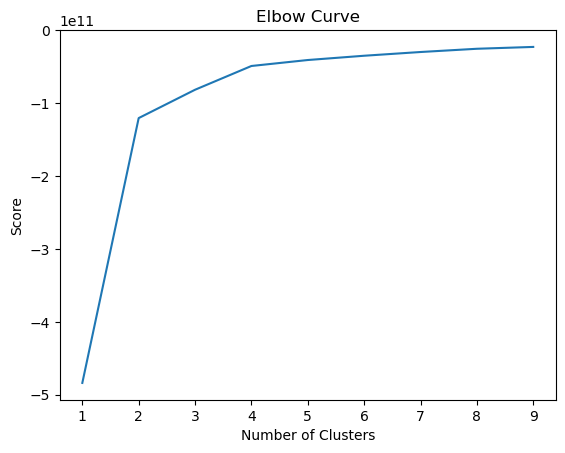

In [46]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I think it's quite clear from the elbow curve that there is 3 clusters in the data, as there is a large jump from 2 to 3 and then evens out. 

### 3. k-means clustering

In [48]:
# Creating the object based on the n° of clusters
kmeans = KMeans(n_clusters = 3)  

In [50]:
# Fitting the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [51]:
df['clusters'] = kmeans.fit_predict(df)

In [52]:
df.head()

,Total Crime 2021,High School Finished Year 12,High School Finished Year 10,High School Finished Year 8 or below,Median Age,Median Mortage Payments,Median Family Income Weekly,Median Rent Weekly,Average Household Size,Married,Seperated,Divorced,Widowed,Never Married,clusters
0,6685,20904,11067,1924,39,1473,1909,270,2.3,19924,1744,4541,2716,16599,1
1,3250,12505,4706,955,37,1436,1844,285,2.3,10081,764,1954,1355,9738,1
2,2914,18513,10476,1471,48,1950,1848,420,2.4,17877,1279,4360,2837,12391,1
3,119,578,392,146,43,1083,1781,200,2.5,874,69,138,125,573,1
4,4703,16347,9452,1363,38,1733,2026,320,2.5,15447,1370,3290,1890,13397,1


In [53]:
df['clusters'].value_counts()

1    107
0     18
2      6
Name: clusters, dtype: int64

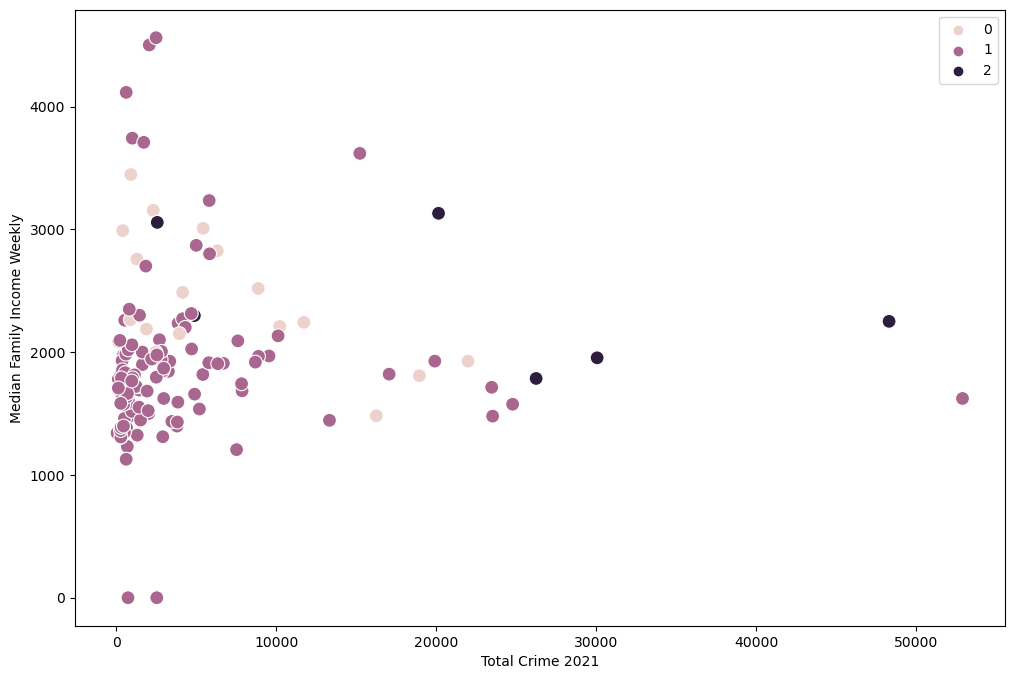

In [56]:
# Plotting the clusters for the "Total Crime 2021" and "Median Family Income Weekly" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Crime 2021'], y=df['Median Family Income Weekly'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Removing the grid from the background.
plt.xlabel('Total Crime 2021') # Label x-axis.
plt.ylabel('Median Family Income Weekly') # Label y-axis.
plt.show()

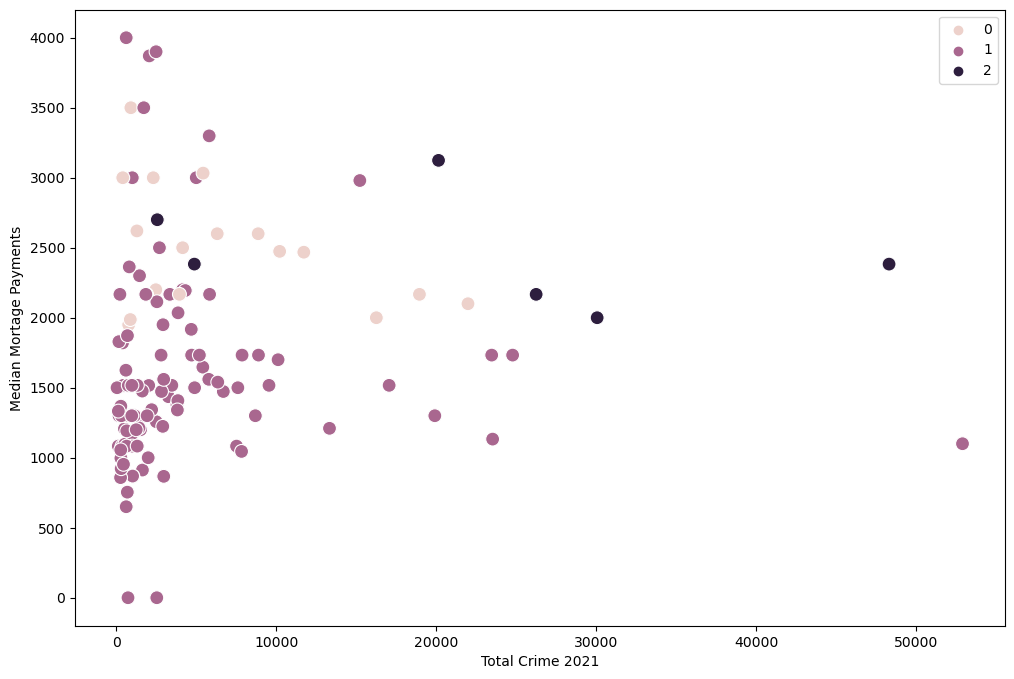

In [57]:
# Plotting the clusters for the "Total Crime 2021" and "Median Mortage Payments" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Crime 2021'], y=df['Median Mortage Payments'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Removing the grid from the background.
plt.xlabel('Total Crime 2021') # Label x-axis.
plt.ylabel('Median Mortage Payments') # Label y-axis.
plt.show()

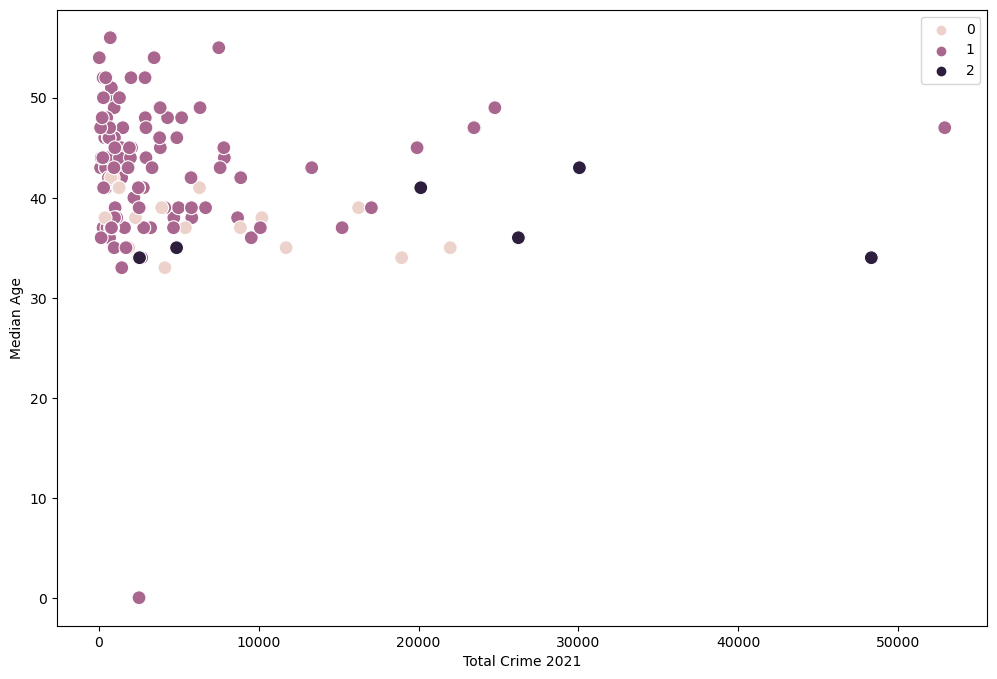

In [58]:
# Plotting the clusters for the "Total Crime 2021" and "Median Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Crime 2021'], y=df['Median Age'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Removing the grid from the background.
plt.xlabel('Total Crime 2021') # Label x-axis.
plt.ylabel('Median Age') # Label y-axis.
plt.show()

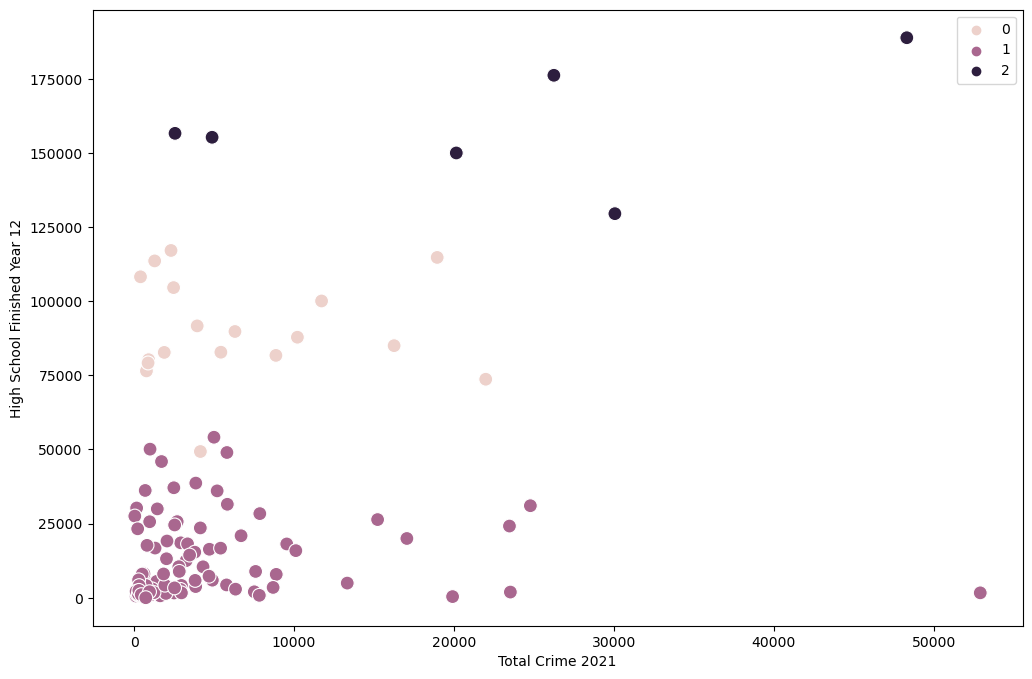

In [59]:
# Plotting the clusters for the "Total Crime 2021" and "High School Finished Year 12" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Crime 2021'], y=df['High School Finished Year 12'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Removing the grid from the background.
plt.xlabel('Total Crime 2021') # Label x-axis.
plt.ylabel('High School Finished Year 12') # Label y-axis.
plt.show()

As I have found out throughout the task, none of the data that I have seems to have a strong correlation between crime (in general) in a paticular area. There are other factors that go into people comitting crime that don't seem to be reflected here. The data that I am using is also total crime, so it's not differentiating between murder and someting like petty thedt. 

In [60]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [61]:
df.groupby('cluster').agg({'Total Crime 2021':['mean', 'median'], 
                         'Median Family Income Weekly':['mean', 'median'], 
                         'Median Mortage Payments':['mean', 'median'],
                          'High School Finished Year 12':['mean', 'median'],
                           'Median Age':['mean', 'median']})

Total Crime 2021          Median Family Income Weekly          \
                        mean   median                        mean  median   
cluster                                                                     
dark purple     22030.000000  23192.0                 2412.833333  2274.5   
pink             6592.111111   4041.5                 2417.388889  2253.5   
purple           4048.261682   1711.0                 1881.635514  1790.0   

            Median Mortage Payments         High School Finished Year 12  \
                               mean  median                         mean   
cluster                                                                    
dark purple             2459.500000  2383.0                159411.333333   
pink                    2474.055556  2471.0                 89937.888889   
purple                  1548.700935  1408.0                 11043.962617   

                      Median Age         
               median       mean median  
cluster                                  
dark purple  155950.5  37.166667   35.5  
pink          86431.5  37.500000   37.5  
purple         4243.0  43.196262   44.0

As mentioned before, it does not seem like there are many links between the available data and the total crime. I think what this is shown is that I should maybe be looking at individual crimes in each area, and not crime as a whole, to get a better idea if serious crime is more prevalent in areas that earn less money. 